## Importing Modules

In [1]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Fine tuning the model

In [3]:
# loading 'l' model of yolo v8
# model = YOLO(yolov8l.pt)
model = YOLO("/kaggle/input/custom-trained-car-detecting-yolo-v8/pytorch/default/1/best.pt") # loading the model finetuned in this notebook

In [4]:
path = '/kaggle/input/yolo-custom-training-car-dataset/Cars.v2i.yolov8/data.yaml'
epoch = 10
# training_results = model.train(data = path, epochs=epoch, resume=True)

In [5]:
# Compress the 'output' directory into a ZIP file named 'output.zip'
# shutil.make_archive('/kaggle/working/output', 'zip', '/kaggle/working/runs')

## Testing the fine tuned model

In [6]:
test_folder_path = '/kaggle/input/cars-image-dataset/Cars Dataset/test'
all_folders = os.listdir(test_folder_path)

In [7]:
# listing all car path in a dictionary
cars_dictionary = {}

for car_name in all_folders:
    car_folder_path = test_folder_path + f'/{car_name}'
    cars_list = os.listdir(car_folder_path)
    cars_path_list = [test_folder_path + f'/{car_name}' +f'/{car}' for car in cars_list]
    cars_dictionary[car_name] = cars_path_list

In [8]:
# creating a sample list
sample_car_path = [cars_dictionary[car][0] for car in cars_dictionary]

In [9]:
results = model.track(sample_car_path, conf = 0.5, save=True)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.4s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 1 car, 21.3ms
1: 640x640 1 car, 21.3ms
2: 640x640 1 car, 21.3ms
3: 640x640 1 car, 21.3ms
4: 640x640 1 car, 21.3ms
5: 640x640 1 car, 21.3ms
6: 640x640 1 car, 21.3ms
Speed: 4.4ms preprocess, 21.3ms inference, 32.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/track


In [10]:
# reading images as arrays
car_1 = mpimg.imread(sample_car_path[0])
car_1_processed = mpimg.imread('/kaggle/working/runs/detect/track/208.jpg')
car_2 = mpimg.imread(sample_car_path[1])
car_2_processed = mpimg.imread('/kaggle/working/runs/detect/track/369.jpg')

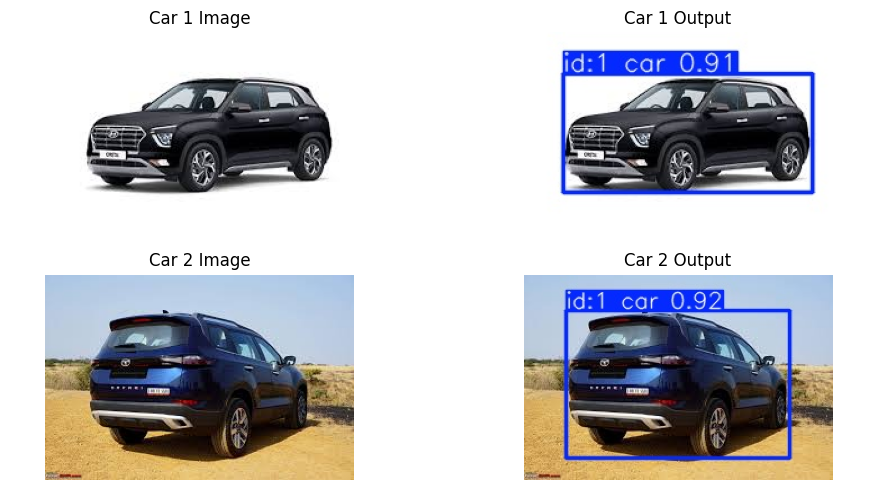

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].imshow(car_1)
axes[0, 0].axis('off')  
axes[0, 0].set_title('Car 1 Image') 

axes[0, 1].imshow(car_1_processed)
axes[0, 1].axis('off')
axes[0, 1].set_title('Car 1 Output')

axes[1, 0].imshow(car_2)
axes[1, 0].axis('off')
axes[1, 0].set_title('Car 2 Image')

axes[1, 1].imshow(car_2_processed)
axes[1, 1].axis('off')
axes[1, 1].set_title('Car 2 Output')

plt.tight_layout()
plt.show()


Previuosly the accuracies were 0.94 and o.79 respectively for car 1 and 2 ( i.e is before fine tuning.)